# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [2]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-04-09 06:25:36--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7c8e664d2066ec6d218b60d7a0.dl.dropboxusercontent.com/cd/0/inline/CQo4dekSm4O7DaiNR1s8YKUg148aS4YQ7wd8fGBJsbe6pjLIgz33KNmE53x_g3k9CCWl6JbmmvhBIT77oioXWaQ_g0ZZx69Jhq33WR59425BCN4okM9uCYaea9EVfSWRQqLfvEyep4z2fxzJ8f6WTwPg/file# [following]
--2024-04-09 06:25:36--  https://uc7c8e664d2066ec6d218b60d7a0.dl.dropboxusercontent.com/cd/0/inline/CQo4dekSm4O7DaiNR1s8YKUg148aS4YQ7wd8fGBJsbe6pjLIgz33KNmE53x_g3k9CCWl6JbmmvhBIT77oioXWaQ_g0ZZx69Jhq33WR59425BCN4okM9uCYaea9EVfSWRQqLfvEyep4z2fxzJ8f6WTwPg/file
Resolving uc7c8e664d2066ec6d218b60d7a0.dl.dropboxusercontent.com (uc7c8e664d2066ec6d218b60d7a0.dl.dropboxusercontent.com)... 162.125.3.15, 2620:1

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [8]:
file_path = '/HousingData.csv'
# TODO: Load the Dataset and Check for mising values and then impute them with the mean value
housing_data = pd.read_csv(file_path)

print(housing_data.head())

print('missing:')
print(housing_data.isnull().sum())

housing_data.fillna(housing_data.mean(), inplace=True)

# print("impute:")
# print(housing_data.isnull().sum())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  
missing:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Get a brief description of the dataset

In [9]:
# TODO: you can use .info() and .description()

print(housing_data.info())
print(housing_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.92

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [10]:
# TODO: drop MEDV and convert to numpy array

new_data = housing_data.drop(columns=['MEDV'])
new_data_array = new_data.values
print(new_data_array)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

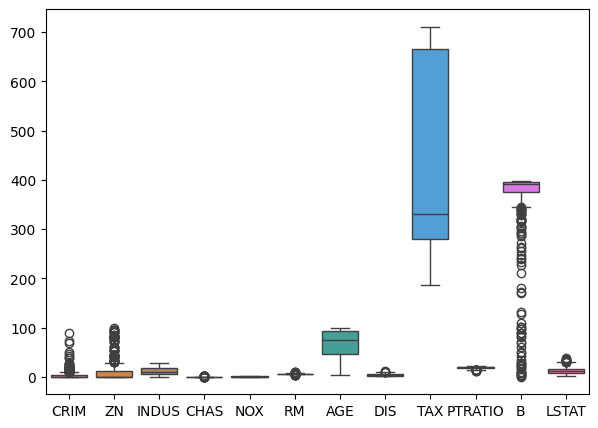

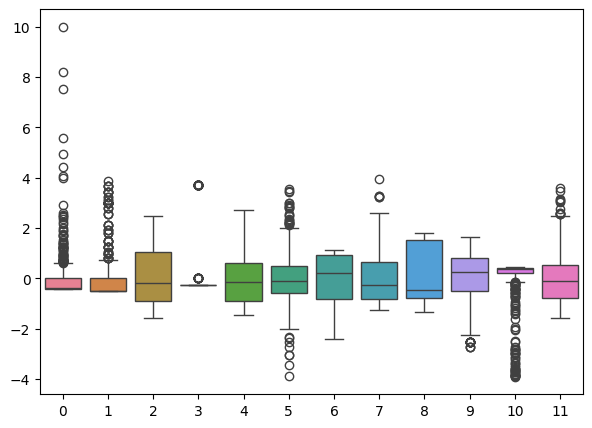

In [42]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=new_data)
plt.show()

print()

if new_data.apply(lambda x: x.abs().max() > 3).any():
  scaler = StandardScaler()
  scaled_data = pd.DataFrame(scaler.fit_transform(new_data))
  plt.figure(figsize=(7, 5))
  sns.boxplot(data=scaled_data)
  plt.show()

add polynomial features to increase model complexity!



In [43]:
poly_features = PolynomialFeatures(degree=2)
features = poly_features.fit_transform(scaled_data)

Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [44]:
# TODO: extract the MEDV
target_column = housing_data['MEDV']
y = target_column.to_numpy()
print(f'{type(y)}')
print(f'{y[:5]}')
print(f'\ny = {y}')

<class 'numpy.ndarray'>
[24.  21.6 34.7 33.4 36.2]

y = [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 



Split the dataset into two parts such that the training set contains 80% of the samples.

In [46]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

# Training


Fit a linear regressor to the data. (Use sklearn)


In [47]:
# TODO: Use sklearn
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

Coefficients of the variables in the sklearn: [ 6.71326437e-15  2.61543210e+00  8.23937159e-01  2.71362629e-01
 -3.48211983e+00 -1.29409137e+00  3.44585661e+00 -1.21943076e+00
 -1.81707978e+00 -1.35705037e+00 -7.62724086e-01  9.41284776e-02
 -3.26790109e+00  1.88815533e-01 -2.12293611e+00  3.27201664e+00
  2.99592944e+00 -2.33583776e+00  3.47631370e-01  2.08741825e-01
  2.21883471e+00 -2.33322440e+00 -2.04447912e+00  7.41756805e-03
  1.19322150e+00 -8.41126027e-02  1.01385910e-01  2.74709658e-01
 -2.78021092e+00 -1.52798130e-01  7.61588328e-01 -1.08630659e+00
  2.97124880e+00 -2.68640233e-01 -3.02213841e+00 -1.60704564e+00
  1.31321171e+00 -3.11014224e-01 -5.10197825e-01  1.28252455e+00
  1.32809034e+00  1.38205448e+00 -6.50905063e-01 -1.06080996e+00
  7.72225398e-01 -5.06351131e-01  1.37177961e+00 -1.08949576e+00
 -9.50138209e-01 -4.45437289e-01 -1.69626905e+00  5.47158139e-01
 -1.88581634e-01  6.91851939e-03 -4.71226094e-01 -3.79170284e-01
 -1.24093403e+00  3.76740641e-01  3.63408849

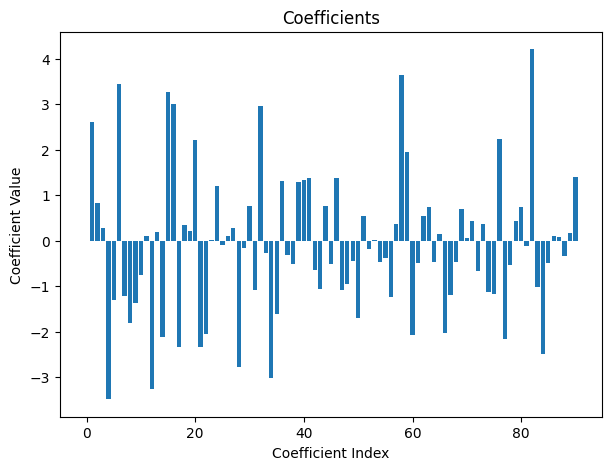

In [56]:
coefficients = regressor.coef_
print(f'Coefficients of the variables in the sklearn: {coefficients}')

plt.figure(figsize=(7, 5))
bar_range = range(len(coefficients))
plt.bar(bar_range, coefficients)
plt.title('Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()

Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [57]:
# TODO: Calculate R² score and MSE on the training dataset
r2_score = regressor.score(X_train, y_train)
print(f'R² score on the training dataset: {r2_score}')

y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'MSE on the training dataset : {mse}')

R² score on the training dataset: 0.9233615957926449
MSE on the training dataset : 6.65783903781899


Predict the value of "y" for each "x" belonging to the "testing" set

In [58]:
y_pred_test = regressor.predict(X_test)
print(y_pred_test)

[26.60760472 39.62214268 18.71401934 21.00627478 15.36932115 18.14967249
 19.2680689  14.04520907 20.41411804 19.68358046 19.34721612 17.80080883
  9.52923494 17.56130221 17.61765281 23.1886407  19.83784911  9.82571722
 48.00938013 13.01200313 24.67113881 28.75366122 15.14797668 19.48768303
 16.8711114  16.54597743 17.07120558 13.34377675 16.66485127 19.34855953
 18.50229727 23.95889069 15.48239335 25.70102382 13.69224402 17.48588361
 33.1589375  20.10130817 20.24277819 21.68697931 16.91569466 31.33039866
 53.78155342 15.35787882 27.30502419 15.90970181 14.76748839 23.49841731
 17.57527936 29.19894908 19.95253249 33.61207695 17.02933983 26.86934524
 44.01327048 23.0722288  13.43102214 32.42020215 25.15187612 12.20309801
 25.03914004 29.01333968 31.99975955 14.25741358 27.2478974  13.81980117
 14.35877776 24.56841459 29.12596225 12.07120755 21.52505912 27.39851469
  9.60239834 22.99803726 19.8464662   7.55139317 22.13069349 49.95089019
 11.35178549 11.98183645 18.34848076 12.31262512 15

# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [79]:
# TODO: Use Lasso from sklearn library
lasso_regressor = Lasso(alpha=0.5)
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=0.5)

Get the coefficients of the variables and visualize it.

Coefficients of the variables: [ 0.         -0.          0.         -0.          0.         -0.
  2.71044561 -0.         -0.         -0.17551806 -0.87919831  0.
 -3.61571562 -0.09172222  0.         -0.          0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.          0.          0.
  0.         -0.          0.         -0.          0.21657471 -0.
 -0.          0.         -0.          0.09712834  0.          0.
 -0.         -0.20798319 -0.1485112  -0.          0.         -0.
 -0.          0.         -0.          0.7562266  -0.          0.
 -0.85199921 -0.59720675  0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.26961623  0.          0.         -0.
 -0.8353172   0.         -0.         -0.         -0.2430423

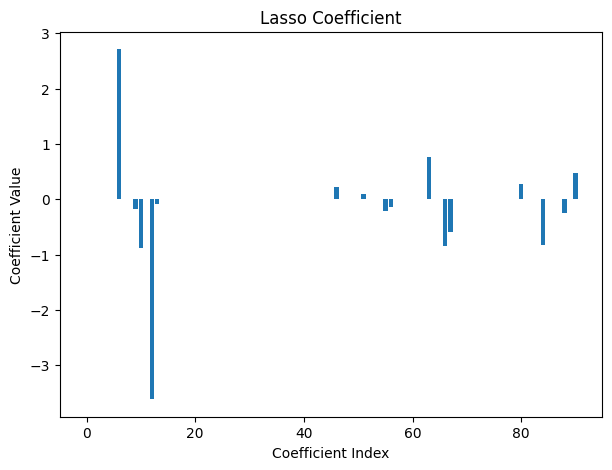

In [80]:
lasso_coef = lasso_regressor.coef_
print(f'Coefficients of the variables: {lasso_coef}')

plt.figure(figsize=(7, 5))
bar_range = range(len(lasso_coef))
plt.bar(bar_range, lasso_coef)
plt.title('Lasso Coefficient')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()

1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

    Your Answer Goes here.
    1- In L1 regularization, the weight distribution is very sparse because not all of the features are selected (less important coefficients become zero). It also has shrinkage due to make some features' importance to  zero. Not that the alpha parameter in this regularization adjusts these two measures (shrinkage and sparsity).
    2- As I said, alpha adjusts the degree of shrinkage and sparsity. The lower the value of alpha, the less coefficients become zero, so we will have less sparsity. On the other hand, the higher the value of alpha, the more sparse the model becomes, because more less important coefficients become zero.

Get the score value on train *dataset*


In [81]:
# TODO: Calculate R² score and MSE on the training dataset

r2_score = lasso_regressor.score(X_train, y_train)
print(f'R² score on the training dataset: {r2_score}')

y_pred = lasso_regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'MSE on the training dataset : {mse}')


R² score on the training dataset: 0.8171286694481938
MSE on the training dataset : 15.88665494849732


Predict the value of "y" for each "x" belonging to the "testing" set

In [83]:
y_pred_test = lasso_regressor.predict(X_test)
print(y_pred_test)

[25.01553605 32.02170508 16.56431707 23.67545781 17.13464034 21.69118954
 18.08272601 14.79576716 20.40693987 19.6387817  21.53217387 19.92343501
  6.64235117 21.28994714 19.61841959 22.15653103 18.10047426 11.57157362
 42.41465504 16.42067495 21.39943226 25.60136064 15.78693485 22.04815612
 17.9021186  17.00238679 19.88982538 13.39822411 21.17351703 19.18396855
 18.45930572 24.45954182 22.28497567 22.26103013 14.87175003 17.51351063
 32.12600448 20.57590791 22.56516819 20.96313305 15.55620789 27.56743981
 44.34319575 18.69292057 24.52131935 17.12080258 16.94276939 24.60012608
 18.02835641 28.77188928 21.29219328 31.99034286 17.89886858 25.3993675
 39.45589001 22.16073425 17.33354312 28.94005254 23.43768009 17.00480941
 24.78746672 31.5308728  28.44268606 19.11754198 26.06453555 17.74025689
 17.46661041 24.07595784 27.21904407 12.41794401 18.96854429 25.30678507
 12.52088818 21.93187535 22.04846018  8.76834845 20.47808211 41.66158441
 15.06191799 13.48259615 21.44899084 12.04377305 21.

# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [91]:
# TODO: Use Ridge from sklearn library
ridge_regressor = Ridge(alpha=5)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=5)

Get the coefficients of the variables and visualize it.

Coefficients of the variables: [ 0.          0.35014864  0.68434854 -0.23596475 -0.63156843 -0.97540978
  3.38533881 -1.20826848 -1.77336385 -0.61666878 -0.8450282   0.40812727
 -3.0335445   0.17367675 -0.4634214   1.05964193  2.0709717  -1.43093833
  0.2514816  -0.22569531  1.12365209 -0.48290029 -0.67295607 -0.063493
  0.76927417  0.10977906  0.0540309   0.1929779  -0.57038804 -0.17557206
  0.22719666 -0.58451494  1.18327291 -0.11176774 -0.67184234 -0.8840974
  0.79247845 -0.1012521   0.10881455  0.76254191  1.02058954  0.97109132
 -0.14202464 -0.87949025  0.49941608 -0.77754824  0.54291649 -1.00891277
 -0.89591589 -0.23848485 -1.08101135  0.7258137  -0.1142485  -0.03369731
 -0.52574156 -0.32415811 -1.12630698 -0.2575344   1.38233431  0.43566627
 -0.95185563 -0.23361477  0.66940798  0.62784107 -0.39704282  0.26331066
 -1.56501271 -1.31480185 -0.38420083  0.53208178  0.19689175  0.40824477
 -0.01843885  0.20333957 -1.01603925 -1.02214217  1.39023911 -0.90626364
 -0.1354934  -0.2205608

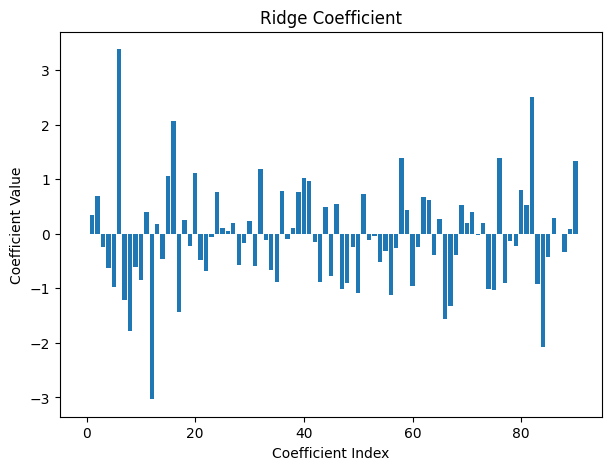

In [92]:
ridge_coef = ridge_regressor.coef_
print(f'Coefficients of the variables: {ridge_coef}')

plt.figure(figsize=(7, 5))
bar_range = range(len(ridge_coef))
plt.bar(bar_range, ridge_coef)
plt.title('Ridge Coefficient')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.show()

1- Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

2- How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

        Your answer goes here
        1- As I said in the previous sections, L1 regularization set a lot of coefficients to zero so it is very sparse. But L2 regularization focuses on reducing the magnitude of coefficients, not set them to zero. So it is less sparse than the L1 regularization, more smoother and more continuous penalty.
        2- The higher the alpha value, the more coefficients decrease to near zero (not zero but low). The lower the alpha value, the regularization will be weaker, so coefficients will have larger magnitudes. If the model becomes complex, lower alpha will lead to overfitting.

Get the score value on train *dataset*

In [93]:
# TODO: Calculate R² score and MSE on the training dataset

r2_score = ridge_regressor.score(X_train, y_train)
print(f'R² score on the training dataset: {r2_score}')

y_pred = ridge_regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f'MSE on the training dataset : {mse}')

R² score on the training dataset: 0.9183028778286344
MSE on the training dataset : 7.097307086383514


Predict the value of "y" for each "x" belonging to the "testing" set



In [94]:
y_pred_test = ridge_regressor.predict(X_test)
print(y_pred_test)

[26.67219198 38.17817919 19.20604167 21.62511069 15.29107997 19.73017229
 19.02299518 13.34910155 21.41935298 19.6088748  19.71765454 17.67249332
  8.07305407 18.99678662 17.70278507 22.6348135  19.25960661 10.65779678
 47.98432873 13.07064794 25.8122793  28.81350442 15.42890089 20.66016016
 16.87265344 16.60319077 17.72816822 13.14105347 18.24673233 19.16007906
 18.40939787 23.9358733  16.76261445 24.64141465 14.44174261 17.171113
 33.11544372 20.26476613 21.17635849 21.80330497 16.81034913 31.06713402
 53.19194526 16.08495345 26.90356739 15.95414346 15.1258431  23.97293369
 17.90238218 28.47771024 18.75916625 33.32518592 16.94027276 25.73108191
 43.52186113 23.01352962 14.49423181 32.42644387 25.077235   13.82449768
 24.94931667 32.43078441 31.02475544 15.54044959 25.67416414 15.26765288
 14.52304027 24.4636752  30.26778897 12.28130472 21.02328336 27.73427485
 10.07744133 22.08125344 20.54610854  6.31531343 21.05727632 49.87472098
 11.1723486  13.20038522 18.93562919 11.97049893 17.4

# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [100]:
def calculate_MSE_test():
  mse_test_linear = mean_squared_error(y_test,  regressor.predict(X_test))
  mse_test_lasso = mean_squared_error(y_test, lasso_regressor.predict(X_test))
  mse_test_ridge = mean_squared_error(y_test, ridge_regressor.predict(X_test))
  return [mse_test_linear, mse_test_lasso, mse_test_ridge]

def calculate_MSE_train():
  mse_train_linear = mean_squared_error(y_train, regressor.predict(X_train))
  mse_train_lasso = mean_squared_error(y_train, lasso_regressor.predict(X_train))
  mse_train_ridge = mean_squared_error(y_train, ridge_regressor.predict(X_train))
  return [mse_train_linear, mse_train_lasso, mse_train_ridge]

def calculate_r2_test():
  # R² Score Test
  r2_test_linear = r2_score(y_test,  regressor.predict(X_test))
  r2_test_lasso = r2_score(y_test, lasso_regressor.predict(X_test))
  r2_test_ridge = r2_score(y_test, ridge_regressor.predict(X_test))
  return [r2_test_linear, r2_test_lasso, r2_test_ridge]

def calculate_r2_train():
  r2_train_linear = r2_score(y_train, regressor.predict(X_train))
  r2_train_lasso = r2_score(y_train, lasso_regressor.predict(X_train))
  r2_train_ridge = r2_score(y_train, ridge_regressor.predict(X_train))
  return [r2_train_linear, r2_train_lasso, r2_train_ridge]

In [101]:
# HINT: Use DataFrame tools
data = {
    'Model': ['Basic Regression', 'Lasso Regression', 'Ridge Regression'],
    'MSE(Test)': calculate_MSE_test(),
    'MSE(Train)': calculate_MSE_train(),
    'R² Score (Test)': calculate_r2_test(),
    'R² Score (Train)': calculate_r2_train()
}
data = pd.DataFrame(data)
print(data)

              Model  MSE(Test)  MSE(Train)  R² Score (Test)  R² Score (Train)
0  Basic Regression  18.122077    6.657839         0.752882          0.923362
1  Lasso Regression  16.227427   15.886655         0.778718          0.817129
2  Ridge Regression  15.716632    7.097307         0.785684          0.918303


 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>
Discuss why this might be the case.*

          your answer goes here.
          The Ridge Regression model performance was the best on the test data, while it has the lowest MSE Test and the highest R² Score Test. The results on the train data differ due to the regularization techniques used, like pushing unimportant coefficients to zero or near it, setting the alpha value and other parameters that I've discussed in the previous sections, leading to difference in training the data.
          Also we can see that Ridge Regression achieves a better balance between bias and variance (better generalization) to unseen data compared to Linear and Lasso Regression! After Ridge regression, Lasso Regression has a good generalization. Also by the results, we can understand the linear regularization has overfitted the data.
        